# Data Analysis of Data Analysts

Project 1

In [1]:
# Dependencies and Setup
import os
import csv
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from scipy.stats import sem
from scipy.stats import linregress
import scipy.stats as st
import numpy as np
import requests
import json
from config import acct_id
from config import api_key 


In [2]:
#Create a list of all 50 states

states = ["AL","AK","AZ","AR","CA","CO","CT","DE","FL","GA","HI","ID","IL","IN","IA","KS","KY","LA",
          "ME","MD","MA","MI","MN","MS","MO","MT","NE","NV","NH","NJ","NM","NY","NC","ND","OH","OK","OR","PA","RI","SC","SD",
         "TN","TX","UT","VT","VA","WA","WV","WI","WY"]

#Use this list to create a Dataframe with empty columns for Median Salary (State/National) as well as for 
#Estimated/Projected jobs

states_df = pd.DataFrame(states)
states_df[["Estimated Jobs","Projected Jobs","Median Salary (State)","Median Salary (National)","Median Salary (City)"]] = ""
states_df = states_df.rename(columns={0:"State"})
states_df

,State,Estimated Jobs,Projected Jobs,Median Salary (State),Median Salary (National),Median Salary (City)
0,AL,,,,,
1,AK,,,,,
2,AZ,,,,,
3,AR,,,,,
4,CA,,,,,
5,CO,,,,,
6,CT,,,,,
7,DE,,,,,
8,FL,,,,,
9,GA,,,,,


In [3]:
# Create variables to store the base_url for the career one stop API.
# Create varibales to store the paramaters of the API call and set params to equal these variables.
headers = {"Authorization": f"Bearer {api_key}"}
base_url = "https://api.careeronestop.org/v1/occupation" 
training ="false"
interest ="false"
videos = "false"
tasks = "false"
dwas ="false"
wages = "true"
alternateOnetTitles = "false"
projectedEmployment = "true"
ooh ="false"
stateLMILinks = "false"
relatedOnetTitles ="false"
skills ="false"
knowledge ="false"
ability = "false"
trainingPrograms ="false"
params = {"training":training,
         "interest":interest,
         "videos":videos,
         "tasks":tasks,
         "dwas":dwas,
         "wages":wages,
         "alternateOnetTitles":alternateOnetTitles,
         "projectedEmployment":projectedEmployment,
         "ooh":ooh,
         "stateLMILinks":stateLMILinks,
         "relatedOnetTitles":relatedOnetTitles,
         "skills":skills,
         "knowledge":knowledge,
         "ability":ability,
         "trainingPrograms":trainingPrograms}
counter = 1

# Create a for loop to iterate through the DataFrame, capturing the state of that row in a variable and using it for the 
# API call for that state. Capture the relevant info in the API call and store in into the DataFrame directly.

# Add an except clause to notify if there is missing or unavailable information for a State.

# Since the API's format is inconsistent (i.e. hourly and annual rates are found in different order/missing, 
#estimated/projected job information is sometimes missing), specific responses for wages and projections were stored in
# variables. List comprehensions were done on these variables not only to ensure the correct information is being found,
# but also return "N/A" in the DataFrame for missing information.

for index, row in states_df.iterrows():

    state = states_df.loc[index,"State"]
    api_url_2 = f"{base_url}/{acct_id}/Data%20Scientists/{state}?{params}"
    response_2= requests.get(api_url_2,headers=headers,params=params).json()
    result_wage = response_2["OccupationDetail"][0]["Wages"]["StateWagesList"]
    result_jobs = response_2["OccupationDetail"][0]["Projections"]["Projections"]

    try:

        states_df.loc[index,"Median Salary (National)"] = response_2["OccupationDetail"][0]["Wages"]["NationalWagesList"][0]["Median"]
    
        median_state_salary = [x['Median'] for x in result_wage if x['RateType']== 'Annual']
        states_df.loc[index,"Median Salary (State)"] = median_state_salary[0] if median_state_salary else "N/A"

                               
        estimated_jobs = [x['EstimatedEmployment'] for x in result_jobs if x['StateName'] != "United States"]
        states_df.loc[index,"Estimated Jobs"] = estimated_jobs[0] if estimated_jobs else "N/A"

                          
        projected_jobs = [x['ProjectedEmployment'] for x in result_jobs if x['StateName'] != "United States"]
        states_df.loc[index,"Projected Jobs"] = projected_jobs[0] if projected_jobs else "N/A"



        print(f"Retrieving Data for {state}: {counter}/50")
        counter = counter +1

 
    except: 

       
        
        print(f"Some information missing for {state}")
        counter = counter+1


states_df

Retrieving Data for AL: 1/50
Retrieving Data for AK: 2/50
Retrieving Data for AZ: 3/50
Retrieving Data for AR: 4/50
Retrieving Data for CA: 5/50
Retrieving Data for CO: 6/50
Retrieving Data for CT: 7/50
Retrieving Data for DE: 8/50
Retrieving Data for FL: 9/50
Retrieving Data for GA: 10/50
Retrieving Data for HI: 11/50
Retrieving Data for ID: 12/50
Retrieving Data for IL: 13/50
Retrieving Data for IN: 14/50
Retrieving Data for IA: 15/50
Retrieving Data for KS: 16/50
Retrieving Data for KY: 17/50
Retrieving Data for LA: 18/50
Retrieving Data for ME: 19/50
Retrieving Data for MD: 20/50
Retrieving Data for MA: 21/50
Retrieving Data for MI: 22/50
Retrieving Data for MN: 23/50
Retrieving Data for MS: 24/50
Retrieving Data for MO: 25/50
Retrieving Data for MT: 26/50
Retrieving Data for NE: 27/50
Retrieving Data for NV: 28/50
Retrieving Data for NH: 29/50
Retrieving Data for NJ: 30/50
Retrieving Data for NM: 31/50
Retrieving Data for NY: 32/50
Retrieving Data for NC: 33/50
Retrieving Data for

,State,Estimated Jobs,Projected Jobs,Median Salary (State),Median Salary (National),Median Salary (City)
0,AL,220,280,85870,103500,
1,AK,90,90,100040,103500,
2,AZ,"1,440","2,170",102770,103500,
3,AR,N/A,N/A,N/A,103500,
4,CA,"18,400","26,700",126810,103500,
5,CO,740,900,103200,103500,
6,CT,860,"1,100",105700,103500,
7,DE,N/A,N/A,132300,103500,
8,FL,"2,550","3,900",100520,103500,
9,GA,"2,250","3,030",100400,103500,


In [4]:
# States with one or more missing data points is not helpful in answering the questions we have posed, and are therefore
# dropped. Dropped states include: AR,DE,MT,NM,ND,VT,WY

states_df.replace('N/A', np.nan, inplace=True)
states_df.dropna(inplace=True)
states_df.reset_index(inplace=True,drop=True,)
states_df

,State,Estimated Jobs,Projected Jobs,Median Salary (State),Median Salary (National),Median Salary (City)
0,AL,220,280,85870,103500,
1,AK,90,90,100040,103500,
2,AZ,"1,440","2,170",102770,103500,
3,CA,"18,400","26,700",126810,103500,
4,CO,740,900,103200,103500,
5,CT,860,"1,100",105700,103500,
6,FL,"2,550","3,900",100520,103500,
7,GA,"2,250","3,030",100400,103500,
8,HI,50,60,112330,103500,
9,ID,0,0,96490,103500,


In [19]:
states_df["Median Salary (State)"] = states_df["Median Salary (State)"].astype('int64')

highest_pay_states = states_df.sort_values(by="Median Salary (State)",ascending=False)
highest_pay_states.reset_index(inplace=True,drop=True)
highest_pay_states

,State,Estimated Jobs,Projected Jobs,Median Salary (State),Median Salary (National),Median Salary (City)
0,WA,2700,3660,135850,103500,
1,VA,2550,3270,132400,103500,
2,NJ,1820,2360,129210,103500,
3,CA,18400,26700,126810,103500,
4,NY,3500,4990,124030,103500,
5,NC,540,700,121970,103500,
6,MD,2330,3050,117730,103500,
7,HI,50,60,112330,103500,
8,RI,260,350,109240,103500,
9,SD,60,80,108310,103500,


In [6]:
states_df.dtypes

State                       object
Estimated Jobs              object
Projected Jobs              object
Median Salary (State)        int64
Median Salary (National)    object
Median Salary (City)        object
dtype: object

In [15]:

states_df['Estimated Jobs'] = states_df['Estimated Jobs'].astype(str)
states_df['Estimated Jobs'] = states_df['Estimated Jobs'].str.replace(',','').astype(int)
estimated_jobs_states = states_df.sort_values(by='Estimated Jobs',ascending=False)
estimated_jobs_states.head()


,State,Estimated Jobs,Projected Jobs,Median Salary (State),Median Salary (National),Median Salary (City)
3,CA,18400,"26,700",126810,103500,
37,TX,4110,"6,150",99350,103500,
27,NY,3500,"4,990",124030,103500,
10,IL,3370,"4,340",103730,103500,
18,MA,2880,"4,340",106070,103500,
40,WA,2700,"3,660",135850,103500,
6,FL,2550,"3,900",100520,103500,
39,VA,2550,"3,270",132400,103500,
29,OH,2490,"3,150",88950,103500,
17,MD,2330,"3,050",117730,103500,


In [16]:
states_df['Projected Jobs'] = states_df['Projected Jobs'].astype(str)
states_df['Projected Jobs'] = states_df['Projected Jobs'].str.replace(',','').astype(int)
projected_jobs_states = states_df.sort_values(by='Projected Jobs',ascending=False)
projected_jobs_states


,State,Estimated Jobs,Projected Jobs,Median Salary (State),Median Salary (National),Median Salary (City)
3,CA,18400,26700,126810,103500,
37,TX,4110,6150,99350,103500,
27,NY,3500,4990,124030,103500,
10,IL,3370,4340,103730,103500,
18,MA,2880,4340,106070,103500,
6,FL,2550,3900,100520,103500,
40,WA,2700,3660,135850,103500,
39,VA,2550,3270,132400,103500,
29,OH,2490,3150,88950,103500,
38,UT,1880,3060,81250,103500,


In [51]:
bar_plot = highest_pay_states.head(10)
bar_plot_plot = pd.DataFrame(bar_plot)
bar_plot_plot.head(10)

,State,Estimated Jobs,Projected Jobs,Median Salary (State),Median Salary (National),Median Salary (City)
0,WA,2700,3660,135850,103500,
1,VA,2550,3270,132400,103500,
2,NJ,1820,2360,129210,103500,
3,CA,18400,26700,126810,103500,
4,NY,3500,4990,124030,103500,
5,NC,540,700,121970,103500,
6,MD,2330,3050,117730,103500,
7,HI,50,60,112330,103500,
8,RI,260,350,109240,103500,
9,SD,60,80,108310,103500,


In [61]:
bar_plot_plot["Growth Rate (%)"] = round((bar_plot_plot["Projected Jobs"]-bar_plot_plot["Estimated Jobs"])/bar_plot_plot["Estimated Jobs"]*100,2)
bar_plot_plot

,State,Estimated Jobs,Projected Jobs,Median Salary (State),Median Salary (National),Median Salary (City),Growth Rate (%)
0,WA,2700,3660,135850,103500,,35.56
1,VA,2550,3270,132400,103500,,28.24
2,NJ,1820,2360,129210,103500,,29.67
3,CA,18400,26700,126810,103500,,45.11
4,NY,3500,4990,124030,103500,,42.57
5,NC,540,700,121970,103500,,29.63
6,MD,2330,3050,117730,103500,,30.90
7,HI,50,60,112330,103500,,20.00
8,RI,260,350,109240,103500,,34.62
9,SD,60,80,108310,103500,,33.33


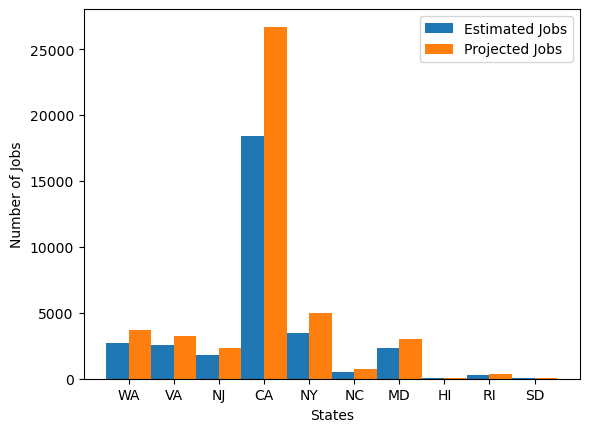

In [83]:

x_axis =np.arange(len(bar_plot_plot["State"]))
y_axis = bar_plot_plot["Estimated Jobs"]
y2 = bar_plot_plot["Projected Jobs"]
bar_width= 0.5

plt.bar(x_axis,y_axis,width=bar_width,label="Estimated Jobs")
plt.bar(x_axis+bar_width,y2, width=bar_width,label="Projected Jobs")
plt.xticks([x + 0.25 for x in x_axis], bar_plot_plot["State"])
plt.ylabel("Number of Jobs")
plt.xlabel("States")
plt.legend()
plt.show()

y = 0.00017737681911267485x + 11.36063195390555
Pearson correlation coefficient: 0.23824647581889025


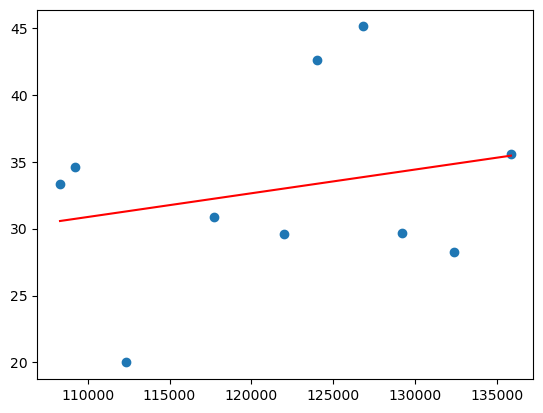

In [94]:
plt.scatter(bar_plot_plot["Median Salary (State)"],bar_plot_plot["Growth Rate (%)"])
slope, intercept, r_value, p_value, std_err = linregress(bar_plot_plot['Median Salary (State)'], bar_plot_plot['Growth Rate (%)'])
pearson_corr = bar_plot_plot['Median Salary (State)'].corr(bar_plot_plot['Growth Rate (%)'])
print(f'y = {slope}x + {intercept}')
plt.plot(bar_plot_plot['Median Salary (State)'], intercept + slope * bar_plot_plot['Median Salary (State)'], 'r', label='Linear Regression')

# Print the correlation coefficient
print(f"Pearson correlation coefficient: {pearson_corr}")
plt.show()

In [100]:
states_df["Growth Rate (%)"] = round((states_df["Projected Jobs"]-states_df["Estimated Jobs"])/states_df["Estimated Jobs"]*100,2)
states_df

,State,Estimated Jobs,Projected Jobs,Median Salary (State),Median Salary (National),Median Salary (City),Growth Rate (%)
0,AL,220,280,85870,103500,,27.27
1,AK,90,90,100040,103500,,0.00
2,AZ,1440,2170,102770,103500,,50.69
3,CA,18400,26700,126810,103500,,45.11
4,CO,740,900,103200,103500,,21.62
5,CT,860,1100,105700,103500,,27.91
6,FL,2550,3900,100520,103500,,52.94
7,GA,2250,3030,100400,103500,,34.67
8,HI,50,60,112330,103500,,20.00
9,ID,0,0,96490,103500,,NaN


In [112]:
states_df=states_df.dropna()
states_df

,State,Estimated Jobs,Projected Jobs,Median Salary (State),Median Salary (National),Median Salary (City),Growth Rate (%)
0,AL,220,280,85870,103500,,27.27
1,AK,90,90,100040,103500,,0.00
2,AZ,1440,2170,102770,103500,,50.69
3,CA,18400,26700,126810,103500,,45.11
4,CO,740,900,103200,103500,,21.62
5,CT,860,1100,105700,103500,,27.91
6,FL,2550,3900,100520,103500,,52.94
7,GA,2250,3030,100400,103500,,34.67
8,HI,50,60,112330,103500,,20.00
10,IL,3370,4340,103730,103500,,28.78


0.17341105807981252


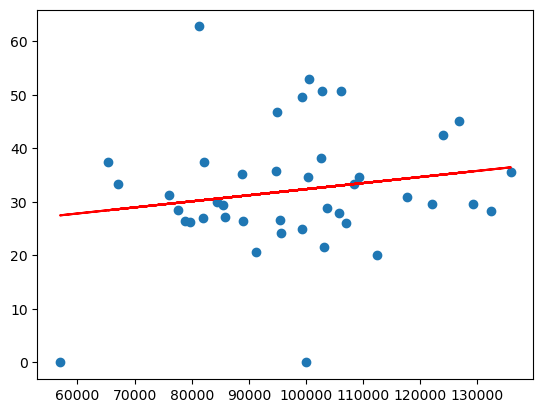

In [113]:
plt.scatter(states_df["Median Salary (State)"],states_df["Growth Rate (%)"])
pearson_corr = states_df['Median Salary (State)'].corr(states_df['Growth Rate (%)'])
slope, intercept, r_value,p_value, std_err = linregress(states_df["Median Salary (State)"], states_df["Growth Rate (%)"])
plt.plot(states_df['Median Salary (State)'], intercept + slope * states_df['Median Salary (State)'],'r', label='Linear Regression')
print(pearson_corr)
plt.show()